# 6.8 回归

决策树还能执行回归任务，使用`Scikit-Learn`的`DecisionTreeRegressor`类来构建一个回归树。

In [12]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [14]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# 旋转数据的表现非常不好，不信的话可以试试下面的moon数据
# data = make_moons(n_samples=(200, 1), random_state=42)[0]
# X = data[:, 0].reshape(-1, 1)
# y = data[:, 1]

In [16]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [18]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file="./images/decision_trees/tree_reg.dot",
    rounded=True,
    filled=True
)

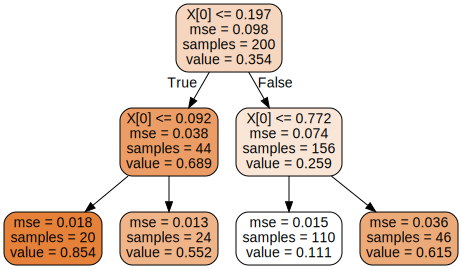

In [20]:
Source.from_file("images/decision_trees/tree_reg.dot")

图6-5的左侧显示了该模型的预测。如果设置`max_depth=3`，将得到如图6-5右侧所示的预测。注意看，每个区域的预测值永远等于该区域内实例的目标平均值。算法分裂每个区域的方法就是使最多的训练实例尽可能接近这个预测值。

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [22]:
def plot_regression_predict(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    """
    绘制回归决策树的预测
    """
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [23]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

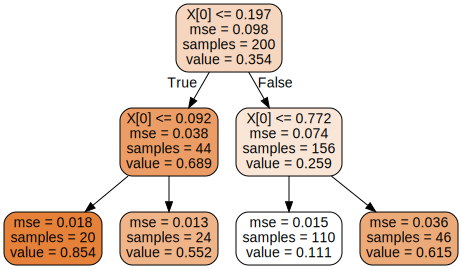

In [24]:
export_graphviz(
    tree_reg1,
    out_file="./images/decision_trees/tree_reg_1.dot",
    rounded=True,
    filled=True
)

Source.from_file("images/decision_trees/tree_reg_1.dot")

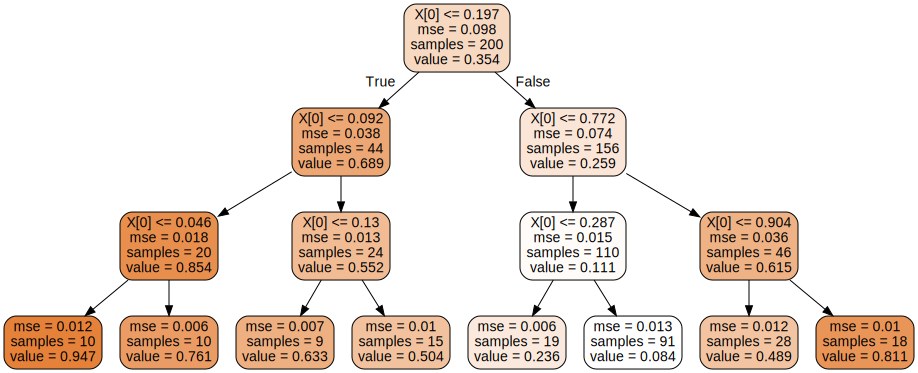

In [25]:
export_graphviz(
    tree_reg2,
    out_file="./images/decision_trees/tree_reg_2.dot",
    rounded=True,
    filled=True
)

Source.from_file("images/decision_trees/tree_reg_2.dot")

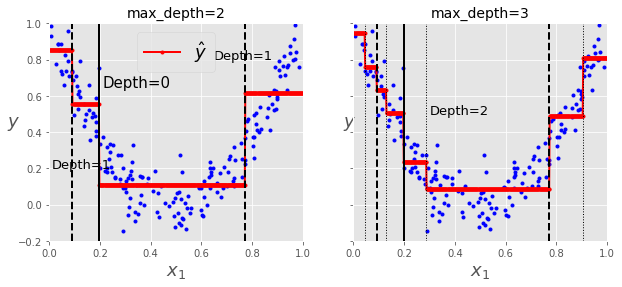

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predict(tree_reg1, X, y)
for split, style in ((0.197, "k-"), (0.092, "k--"), (0.772, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predict(tree_reg2, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

CART算法的工作原理与以前的方法大致相同，不同之处在于，它不再尝试以最小化不纯度的方式来拆分训练集，而是以最小化MSE的方式来拆分训练集。公式6-4给出了算法试图最小化的成本函数。

公式6-4 CART算法回归的loss函数

$$
J(k, t_k) = \frac{m_{left}}{m} \mathbf{MSE}_{left} +  \frac{m_{right}}{m} \mathbf{MSE}_{right}        \tag{6-4}
$$

其中$\begin{cases} \mathbf{MSE}_{node} = \sum_{i \in node} (\hat{y}_{node} - y^{(i)})^2  \\  \hat{y}_{node} = \frac{\sum_{i \in node}  y^{(i)}}{m_{node}} \end{cases}$

就像分类任务一样，决策树在处理回归任务时容易过拟合。如果不进行任何正则化（如使用默认的超参数），你会得到图6-6左侧的预测。这些预测显然非常过拟合训练集。只需设置`min_samples_leaf=10`就可以得到一个更合理的模型，如图6-6右侧所示。

In [27]:
tree_reg_nor = DecisionTreeRegressor(random_state=42)
tree_reg_re = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg_nor.fit(X, y)
tree_reg_re.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

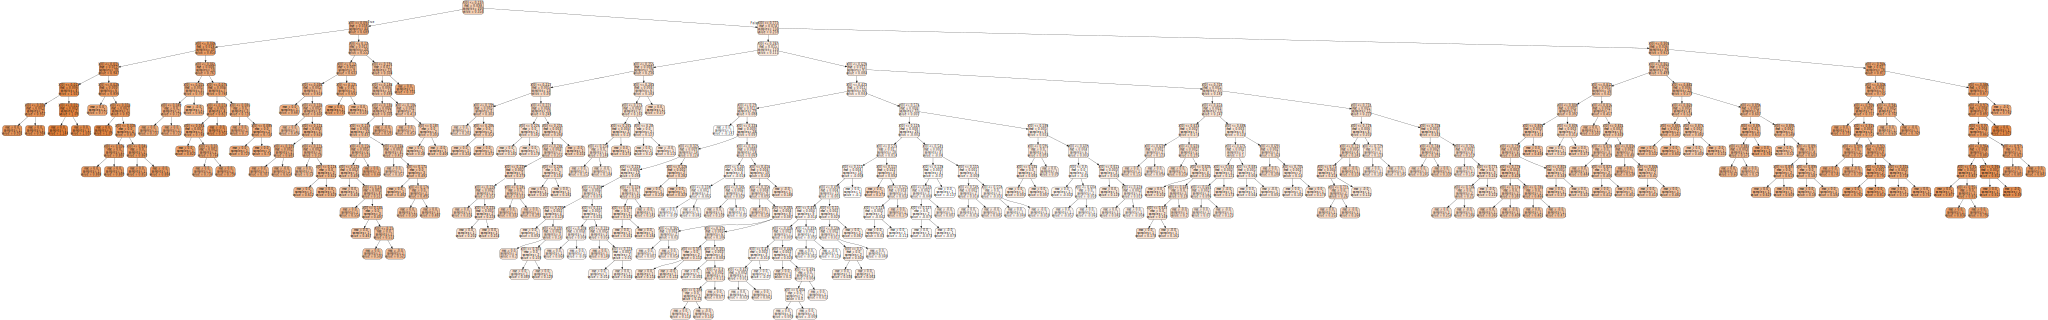

In [28]:
export_graphviz(
    tree_reg_nor,
    out_file="./images/decision_trees/tree_reg_nor.dot",
    rounded=True,
    filled=True
)

Source.from_file("images/decision_trees/tree_reg_nor.dot")

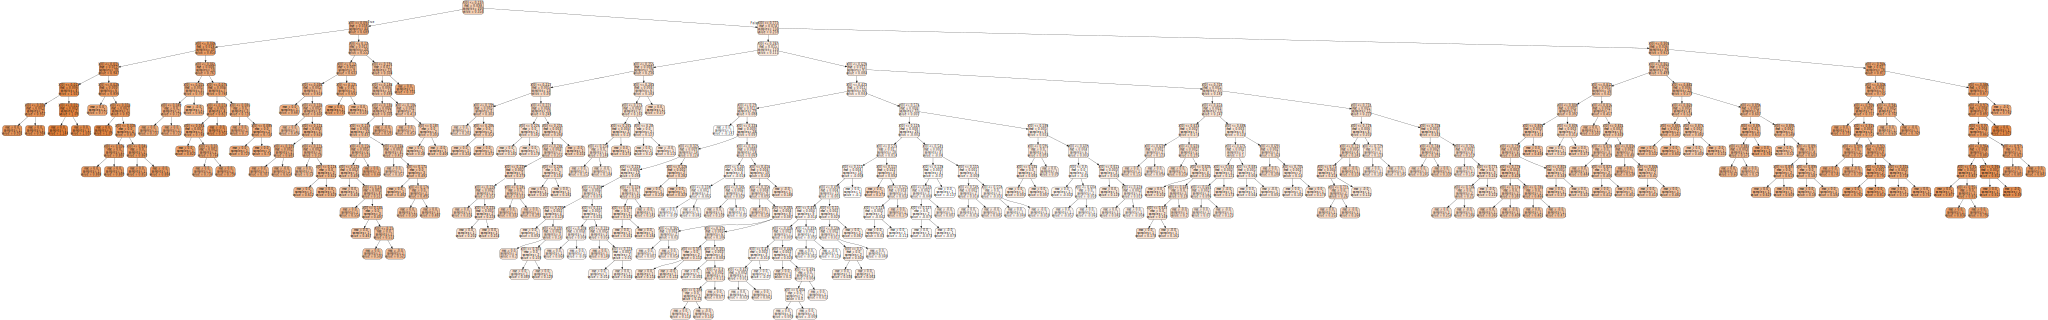

In [29]:
export_graphviz(
    tree_reg_nor,
    out_file="./images/decision_trees/tree_reg_re.dot",
    rounded=True,
    filled=True
)

Source.from_file("images/decision_trees/tree_reg_re.dot")

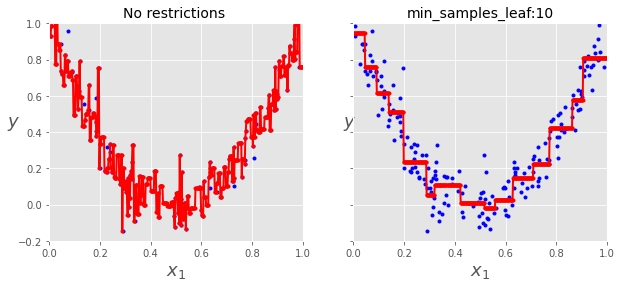

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predict(tree_reg_nor, X, y)
plt.title("No restrictions ", fontsize=14)

plt.sca(axes[1])
plot_regression_predict(tree_reg_re, X, y)
plt.title("min_samples_leaf:{}".format(tree_reg_re.min_samples_leaf), fontsize=14)

plt.show()